## Setup

In [1]:
# mnist 数据集的加载和显示
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers

# 显示tensorflow的版本
tf.__version__

'2.8.0'

## Prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0,1] rage
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28 ,1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Save the minst dataset as a picture

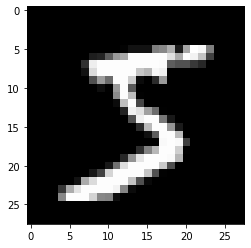

In [3]:
# plot the picture
plt.imshow(x_train[0], cmap='gray')

In [4]:
import os
import scipy.misc
import tensorflow as tf

# 加载图片
data =  tf.keras.datasets.mnist
(x_train_1,y_train_1), (x_test_1,y_test_1) = data.load_data()

# 创建10个文件夹存放0-9的图片
for i in range(10):
    os.makedirs(f"D:/program/Automate_with_Pyhton/Deep Learning Projects/mnist/train/{i}")
    os.makedirs(f"D:/program/Automate_with_Pyhton/Deep Learning Projects/mnist/test/{i}")

In [5]:
# 训练集数据
with open("D:/program/Automate_with_Pyhton/Deep Learning Projects/mnist/train/image_list.txt", 'w') as img_list:
    i = 1
    for img, label in zip(x_train_1, y_train_1):
        img = Image.fromarray(img) # 将array转化成图片
        img_save_path = f"D:/program/Automate_with_Pyhton/Deep Learning Projects/mnist/train/{label}/{i}.jpg" # 图片保存路径
        img.save(img_save_path) # 保存图片
        img_list.write(img_save_path + "\t" + str(label) + "\n")
        i += 1

# 测试集数据
with open("D:/program/Automate_with_Pyhton/Deep Learning Projects/mnist/test/image_list.txt", 'w') as img_list:
    i = 1
    for img, label in zip(x_test_1, y_test_1):
        img = Image.fromarray(img) # 将array转化成图片
        img_save_path = f"D:/program/Automate_with_Pyhton/Deep Learning Projects/mnist/test/{label}/{i}.jpg" # 图片保存路径
        img.save(img_save_path)
        img_list.write(img_save_path + "\t" + str(label) + "\n")
        i += 1

## Build the model

In [6]:
# Build the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# another way to model

# model = keras.Sequential(name="my_sequential")
# model.add(keras.Input(shape=input_shape))  # 28x28 images
# model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(num_classes, activation="softmax"))

# common debugging workflow: add() + summary()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

## Train the model

In [7]:
# Train the model
batch_size = 128
# 对于一个数据集而言，运行一个epoch就是将这个数据集中的图片全部计算一遍。
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 15s 34ms/step - loss: 0.3689 - accuracy: 0.8883 - val_loss: 0.0887 - val_accuracy: 0.9770
Epoch 2/15
422/422 [==============================] - 15s 36ms/step - loss: 0.1156 - accuracy: 0.9650 - val_loss: 0.0571 - val_accuracy: 0.9850
Epoch 3/15
422/422 [==============================] - 15s 35ms/step - loss: 0.0875 - accuracy: 0.9732 - val_loss: 0.0494 - val_accuracy: 0.9863
Epoch 4/15
422/422 [==============================] - 15s 35ms/step - loss: 0.0738 - accuracy: 0.9773 - val_loss: 0.0422 - val_accuracy: 0.9883
Epoch 5/15
422/422 [==============================] - 15s 35ms/step - loss: 0.0662 - accuracy: 0.9794 - val_loss: 0.0360 - val_accuracy: 0.9893
Epoch 6/15
422/422 [==============================] - 15s 36ms/step - loss: 0.0572 - accuracy: 0.9816 - val_loss: 0.0355 - val_accuracy: 0.9897
Epoch 7/15
422/422 [==============================] - 15s 35ms/step - loss: 0.0537 - accuracy: 0.9830 - val_loss: 0.0340 - val_accuracy:

## Evaluate the trained model

In [8]:
# Evaluate the trained model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0255363080650568
Test accuracy: 0.9915000200271606
